In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
from fancyimpute import KNN
from functools import reduce
import plotly.express as px
import plotly.graph_objects as go 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import plotly.io as pio
pio.renderers.default='notebook'
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [54]:
# We import the dataset that we created in our Data Wrangling section of the Capstone project 
# Import the dataset

df=pd.read_csv('/Users/amrita/Desktop/new_df.csv')
df.head()

,satisfaction,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,...,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Eco,Eco_Plus,disloyal_Customer,Personal_Travel,Male
0,1,1.691495,-1.671090,-0.386036,-0.392329,0,0,0,2,2,...,0,3,5,3,2,1,0,0,1,0
1,1,0.500825,0.470348,7.786328,7.536854,0,0,0,3,0,...,4,4,2,3,2,0,0,0,1,1
2,1,-1.615922,0.152882,-0.386036,-0.392329,0,0,0,3,2,...,3,4,4,4,2,1,0,0,1,0
3,1,1.360753,-1.322461,-0.386036,-0.392329,0,0,0,3,3,...,0,1,4,1,3,1,0,0,1,0
4,1,2.022237,-1.584420,-0.386036,-0.392329,0,0,0,3,4,...,0,2,4,2,5,1,0,0,1,0


# Check Correlations

In [55]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr(method= 'spearman').abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 30))

Top Absolute Correlations
Departure_Delay_in_Minutes         Arrival_Delay_in_Minutes             0.740284
Seat_comfort                       Food_and_drink                       0.705452
Ease_of_Online_booking             Online_boarding                      0.662621
Online_support                     Online_boarding                      0.650395
Baggage_handling                   Cleanliness                          0.641254
Inflight_wifi_service              Online_boarding                      0.616602
Online_support                     Ease_of_Online_booking               0.603637
Inflight_wifi_service              Ease_of_Online_booking               0.579588
On_board_service                   Cleanliness                          0.578680
satisfaction                       Inflight_entertainment               0.577601
On_board_service                   Baggage_handling                     0.555065
Departure/Arrival_time_convenient  Gate_location                        0.554920
  

In [56]:
# The following variables are dropped based on VIF analysis and the final model was re-fit.

df=df.drop('Ease_of_Online_booking', axis=1)

In [57]:
df=df.drop(['Baggage_handling', 'Cleanliness'], axis=1)

In [58]:
df=df.drop(['Online_support'], axis=1)

In [59]:
df=df.drop(['Food_and_drink','Inflight_wifi_service'], axis=1)

In [60]:
df=df.drop(['Departure_Delay_in_Minutes'], axis=1)

In [61]:
# With statsmodel 
# Train-test split 80:20

train, test = train_test_split(df, test_size=0.2)
col = "satisfaction"
xtest= test.loc[:, test.columns != col]
ytest= test[['satisfaction']]
col = "satisfaction"
xtrain = train.loc[:, train.columns != col]
ytrain= train[['satisfaction']]
model= sm.GLM(ytrain, xtrain, family=sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           satisfaction   No. Observations:               103589
Model:                            GLM   Df Residuals:                   103573
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46022.
Date:                Thu, 25 Aug 2022   Deviance:                       92044.
Time:                        15:49:08   Pearson chi2:                 1.18e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age   

In [62]:
# Model with Scikit Learn

X_train_newseed, X_test_newseed, y_train_newseed,y_test_newseed = train_test_split(df, df.satisfaction, test_size=0.2, random_state=105)
X_train_newseed.drop('satisfaction', axis=1, inplace=True)
X_test_newseed.drop('satisfaction', axis=1, inplace=True)
model_scikit = LogisticRegression(max_iter=10000).fit(X_train_newseed, y_train_newseed)
y_pred= model_scikit.predict(X_test_newseed)

In [73]:
#training 

y_pred_newseed1=model_scikit.predict(X_train_newseed)

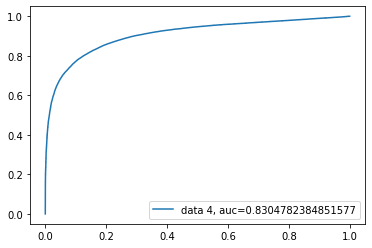

In [75]:
# AUC (training)

from sklearn import metrics

y_pred_proba_newseed1 = model_scikit.predict_proba(X_train_newseed)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train_newseed,  y_pred_proba_newseed1)
auc_newseed1 = metrics.roc_auc_score(y_train_newseed, y_pred_newseed1)
plt.plot(fpr,tpr,label="data 4, auc="+str(auc_newseed1))
plt.legend(loc=4)
plt.show()

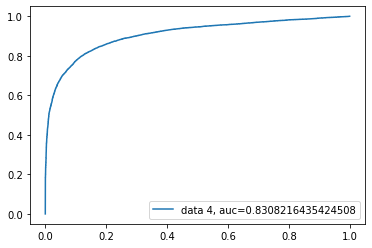

In [63]:
# AUC

from sklearn import metrics

y_pred_proba_newseed = model_scikit.predict_proba(X_test_newseed)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_newseed,  y_pred_proba_newseed)
auc_newseed = metrics.roc_auc_score(y_test_newseed, y_pred)
plt.plot(fpr,tpr,label="data 4, auc="+str(auc_newseed))
plt.legend(loc=4)
plt.show()

In [64]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test_newseed, y_pred))
print("Precision:",metrics.precision_score(y_test_newseed, y_pred))
print("Recall:",metrics.recall_score(y_test_newseed, y_pred))

Accuracy: 0.8328442350760676
Precision: 0.8416783216783217
Recall: 0.8535564853556485


# Check VIF for multicollinearity

In [65]:
X_new_nested=df.drop(['satisfaction'], axis=1)
vif_data_nested = pd.DataFrame()
vif_data_nested["feature"] = X_new_nested.columns

In [66]:
vif_data_nested["VIF"] = [variance_inflation_factor(X_new_nested.values, i)
                          for i in range(len(X_new_nested.columns))]

In [67]:
vif_data_nested.sort_values("VIF")

,feature,VIF
2,Arrival_Delay_in_Minutes,1.016725
1,Flight_Distance,1.156264
0,Age,1.217909
12,Eco_Plus,1.257224
13,disloyal_Customer,1.733604
15,Male,1.925005
14,Personal_Travel,2.789679
11,Eco,3.163542
4,Departure/Arrival_time_convenient,8.249235
10,Online_boarding,8.440939
